# MOHAMMED REHAN
DATA SCIENCE INTERN@CODSOFT (ID:CS07WX72568)

TASK-01- TITANIC SURVIVAL PREDICTION

In [248]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from warnings import filterwarnings
filterwarnings(action='ignore')

In [249]:
#reading dataset
ds=pd.read_csv(r"C:\datasets\codsofttitanic.csv")
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [250]:
ds.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [251]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [252]:
ds.shape

(418, 12)

In [253]:
ds.dropna(inplace=True)
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [254]:
ds.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [255]:
ds.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,1,female,23.0,1,0,82.2667,S
14,1,1,female,47.0,1,0,61.1750,S
24,1,1,female,48.0,1,3,262.3750,C
26,1,1,female,22.0,0,1,61.9792,C
28,0,1,male,41.0,0,0,30.5000,S
...,...,...,...,...,...,...,...,...
404,0,1,male,43.0,1,0,27.7208,C
405,0,2,male,20.0,0,0,13.8625,C
407,0,1,male,50.0,1,1,211.5000,C
411,1,1,female,37.0,1,0,90.0000,Q


In [256]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 12 to 414
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  87 non-null     int64  
 1   Pclass    87 non-null     int64  
 2   Sex       87 non-null     object 
 3   Age       87 non-null     float64
 4   SibSp     87 non-null     int64  
 5   Parch     87 non-null     int64  
 6   Fare      87 non-null     float64
 7   Embarked  87 non-null     object 
dtypes: float64(2), int64(4), object(2)
memory usage: 6.1+ KB


In [257]:
ds.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,0.505747,1.137931,39.247126,0.597701,0.482759,98.109198
std,0.502865,0.435954,15.218730,0.637214,0.860801,88.177319
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,27.000000,0.000000,0.000000,35.339600
50%,1.000000,1.000000,39.000000,1.000000,0.000000,71.283300
75%,1.000000,1.000000,50.000000,1.000000,1.000000,135.066650
max,1.000000,3.000000,76.000000,3.000000,4.000000,512.329200


In [258]:
ds.shape

(87, 8)

In [259]:
ds.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [260]:
ds.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.056699,0.022983,0.170596,0.181554,0.179047
Pclass,-0.056699,1.000000,-0.410924,-0.132790,0.006411,-0.298186
Age,0.022983,-0.410924,1.000000,0.062530,0.051144,0.180567
SibSp,0.170596,-0.132790,0.062530,1.000000,0.252194,0.213014
Parch,0.181554,0.006411,0.051144,0.252194,1.000000,0.395685
Fare,0.179047,-0.298186,0.180567,0.213014,0.395685,1.000000


# VISUALIZATION

# HEATMAP

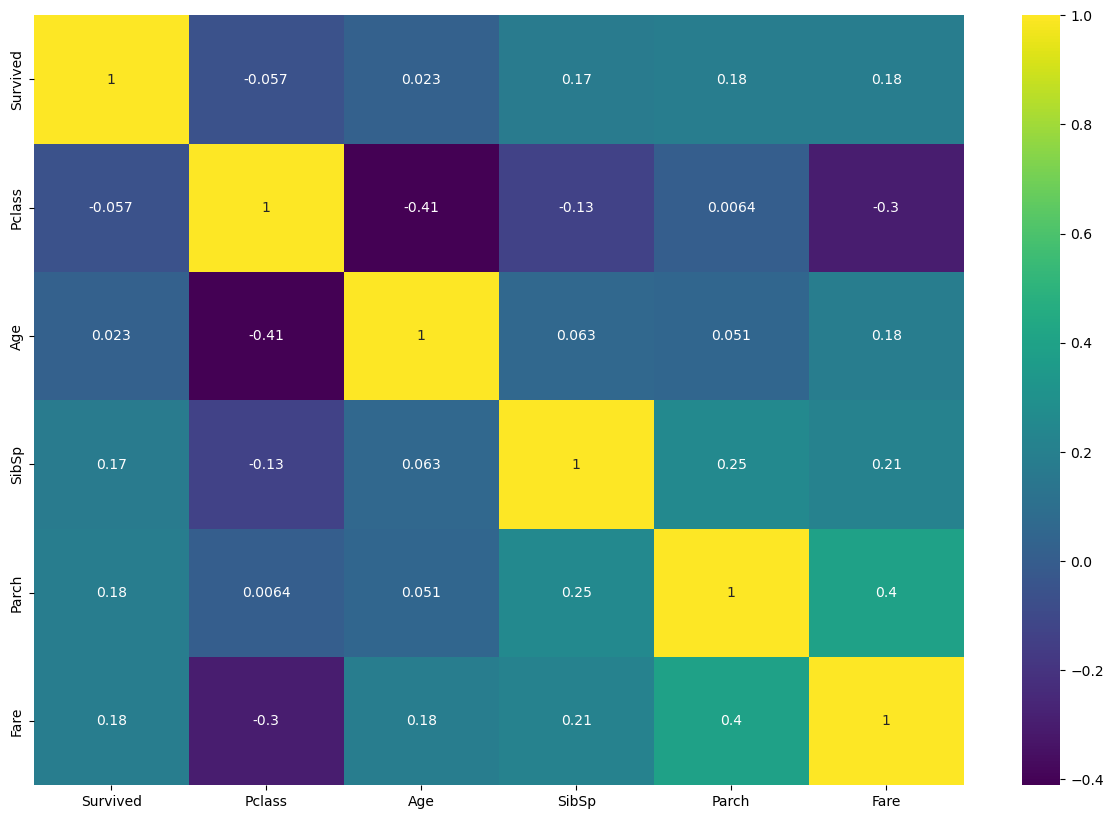

In [261]:
plt.figure(figsize=(15,10))
sns.heatmap(ds.corr(),cmap='viridis',annot=True)
plt.show()

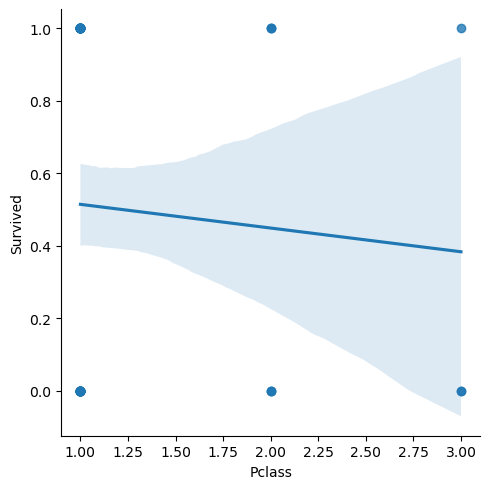

In [262]:
sns.lmplot(ds , x='Pclass', y='Survived')
plt.show()

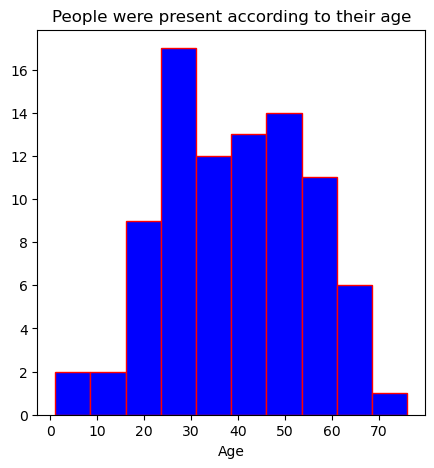

In [263]:
plt.figure(figsize=(5,5))
plt.hist('Age' , data=ds, color='blue',edgecolor='red')
plt.title('People were present according to their age')
plt.xlabel('Age')
plt.show()

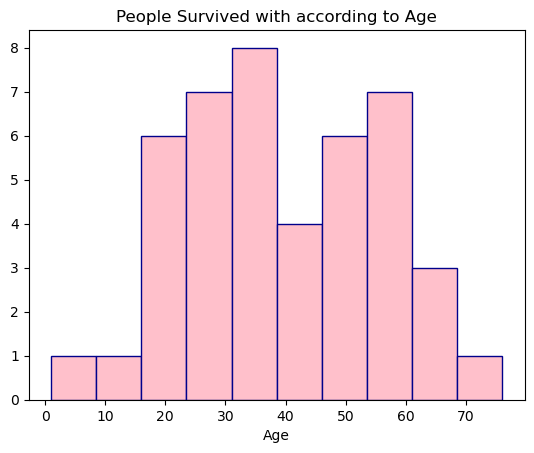

In [264]:
plt.figure()
age = ds.loc[ds.Survived == 1, 'Age']
plt.title('People Survived with according to Age')
plt.xlabel("Age")
plt.hist(age,color='pink',edgecolor='darkblue')
plt.show()

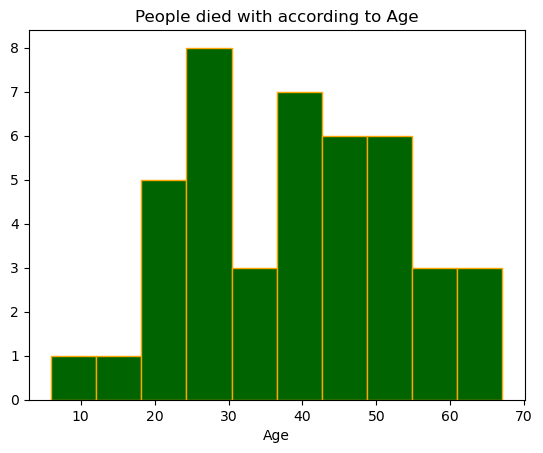

In [265]:
plt.figure()
age = ds.loc[ds.Survived == 0, 'Age']
plt.title('People died with according to Age')
plt.xlabel("Age")
plt.hist(age,color='darkgreen',edgecolor='orange')
plt.show()

In [266]:
survived=len(ds[ds['Survived']==1])
died=len(ds[ds['Survived']==0])
print('No.of people survived :',survived)
print('No.of people died :',died)

No.of people survived : 44
No.of people died : 43


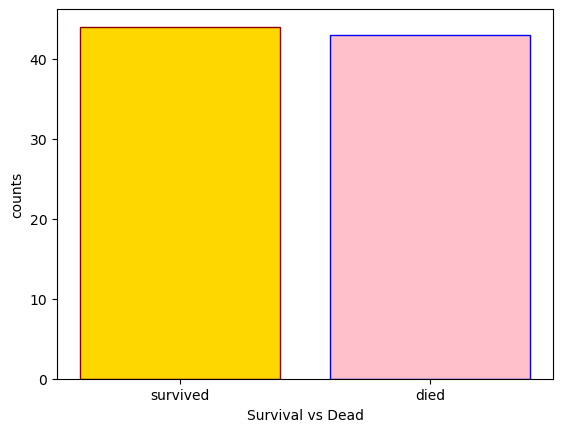

In [311]:
people=['survived','died']
counts=[44,43]
plt.bar(people,counts,color=['gold','pink'],edgecolor=['darkred','blue'])
plt.xlabel('Survival vs Dead')
plt.ylabel('counts')
plt.show()

In [268]:
men=len(ds[ds['Sex']=='male'])
women=len(ds[ds['Sex']=='female'])
print('total no of men:',men)
print('totla no of women:',women )

total no of men: 43
totla no of women: 44


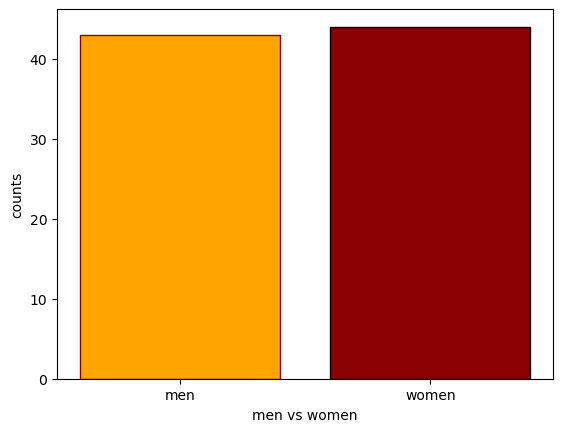

In [310]:
sex=['men','women']
counts=[43,44]
plt.bar(sex,counts,color=['orange','darkred'],edgecolor=['darkred','black'])
plt.xlabel('men vs women')
plt.ylabel('counts')
plt.show()

In [270]:
ds.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [271]:
ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,1,female,23.0,1,0,82.2667,S
14,1,1,female,47.0,1,0,61.1750,S
24,1,1,female,48.0,1,3,262.3750,C
26,1,1,female,22.0,0,1,61.9792,C
28,0,1,male,41.0,0,0,30.5000,S
...,...,...,...,...,...,...,...,...
404,0,1,male,43.0,1,0,27.7208,C
405,0,2,male,20.0,0,0,13.8625,C
407,0,1,male,50.0,1,1,211.5000,C
411,1,1,female,37.0,1,0,90.0000,Q


In [272]:
ds.drop(['Embarked','Sex'],axis=1,inplace=True)

In [273]:
ds.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [274]:
ds

,Survived,Pclass,Age,SibSp,Parch,Fare
12,1,1,23.0,1,0,82.2667
14,1,1,47.0,1,0,61.1750
24,1,1,48.0,1,3,262.3750
26,1,1,22.0,0,1,61.9792
28,0,1,41.0,0,0,30.5000
...,...,...,...,...,...,...
404,0,1,43.0,1,0,27.7208
405,0,2,20.0,0,0,13.8625
407,0,1,50.0,1,1,211.5000
411,1,1,37.0,1,0,90.0000


In [275]:
ds.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

# TRAINING DATASET

In [276]:
x=ds.drop('Survived',axis=1)
y=ds['Survived']

In [277]:
x.shape,y.shape

((87, 5), (87,))

In [238]:
y

12     1
14     1
24     1
26     1
28     0
      ..
404    0
405    0
407    0
411    1
414    1
Name: Survived, Length: 87, dtype: int64

In [278]:
x

,Pclass,Age,SibSp,Parch,Fare
12,1,23.0,1,0,82.2667
14,1,47.0,1,0,61.1750
24,1,48.0,1,3,262.3750
26,1,22.0,0,1,61.9792
28,1,41.0,0,0,30.5000
...,...,...,...,...,...
404,1,43.0,1,0,27.7208
405,2,20.0,0,0,13.8625
407,1,50.0,1,1,211.5000
411,1,37.0,1,0,90.0000


In [281]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [282]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((69, 5), (18, 5), (69,), (18,))

# LOGISTIC REGRESSION

In [283]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [284]:
model.intercept_

array([-0.00110836])

In [285]:
model.coef_

array([[-1.21587673e-01, -3.26214229e-03,  1.17413127e-01,
         3.53650777e-01, -1.07925734e-04]])

In [289]:
y_pred=model.predict(x_test)

In [290]:
model.score(x_test,y_pred)

1.0

In [293]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5555555555555556

In [294]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.7999999999999998

In [295]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.4444444444444444

# Decision Tree Classifier

In [305]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [306]:
y_pred=model.predict(x_test)
model.score(x_test,y_pred)

1.0

In [307]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.4444444444444444

In [308]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-1.25

In [309]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.5555555555555556